In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (9,6)

In [149]:
from astropy.timeseries import LombScargle
def calc_lomb_scargle(t,y):
   oversample = 10
   tmax = t.max()
   tmin = t.min()
   df = 1.0 / (tmax - tmin)
   fmin = df
   fmax = 10 # was 360 # maximum frequency in cycles per day (c/d)
 
   freq = np.arange(fmin, fmax, df / oversample)
   model = LombScargle(t, y)
   sc = model.power(freq, method="fast", normalization="psd")
 
   fct = np.sqrt(4./len(t))
   amp = np.sqrt(sc) * fct
   return freq*11.574, amp*1E6 # return frequency in muHz and amplitude in ppm

In [130]:
# eroscg2 = pd.read_csv('../pydia.KMTNJ175248.7-284518.SI.txt',sep='\t', names=['hjd', 'imag'],
#                       usecols=[0,1],header=None)
eroscg2 = np.loadtxt('../KMTnet_data/pydia.KMTNJ175248.7-284518.AI.txt')

# well apparently these aren't sorted by ascending hjd so that's weird but okay
# umm... why is this upside down from the one Jamie posted?

# eroscg2 = eroscg2[eroscg2[:,0].argsort()]

In [131]:
eroscg2

array([[7.44027822e+03, 1.44350000e+01, 6.00000000e-03, ...,
        3.36000000e+00, 1.98570000e+03, 1.28000000e+00],
       [7.44227370e+03, 1.44390000e+01, 8.00000000e-03, ...,
        5.08000000e+00, 1.85110000e+03, 1.23000000e+00],
       [7.44226258e+03, 1.44280000e+01, 8.00000000e-03, ...,
        4.82000000e+00, 1.73880000e+03, 1.24000000e+00],
       ...,
       [9.79006197e+03, 1.45340000e+01, 4.00000000e-03, ...,
        2.16000000e+00, 7.02000000e+02, 1.04000000e+00],
       [7.83990225e+03, 1.46080000e+01, 1.00000000e-03, ...,
        1.03000000e+00, 8.30300000e+02, 1.06000000e+00],
       [7.98359478e+03, 1.46060000e+01, 1.00000000e-03, ...,
        1.04000000e+00, 9.96300000e+02, 1.13000000e+00]])

In [132]:
eroscg2_hjd = eroscg2[:,0]
eroscg2_imag = eroscg2[:,1]

In [133]:
eroscg2_hjd

array([7440.27822, 7442.2737 , 7442.26258, ..., 9790.06197, 7839.90225,
       7983.59478])

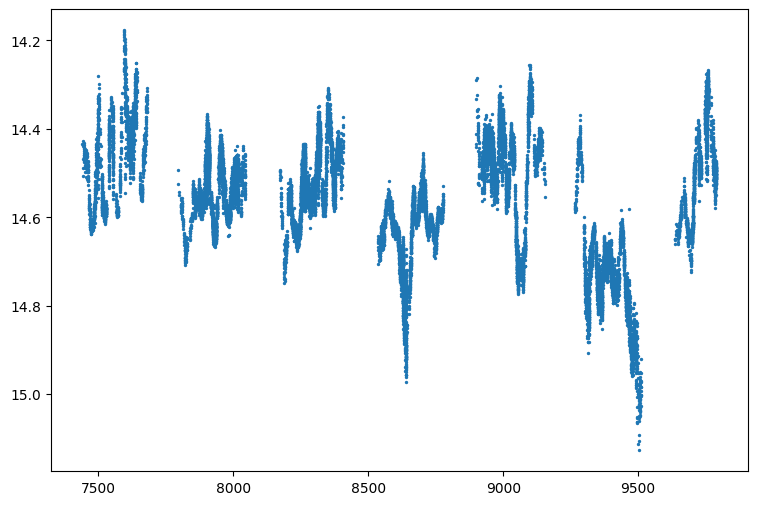

In [134]:
plt.scatter(eroscg2_hjd,eroscg2_imag,s=2)
plt.gca().invert_yaxis()
plt.show()

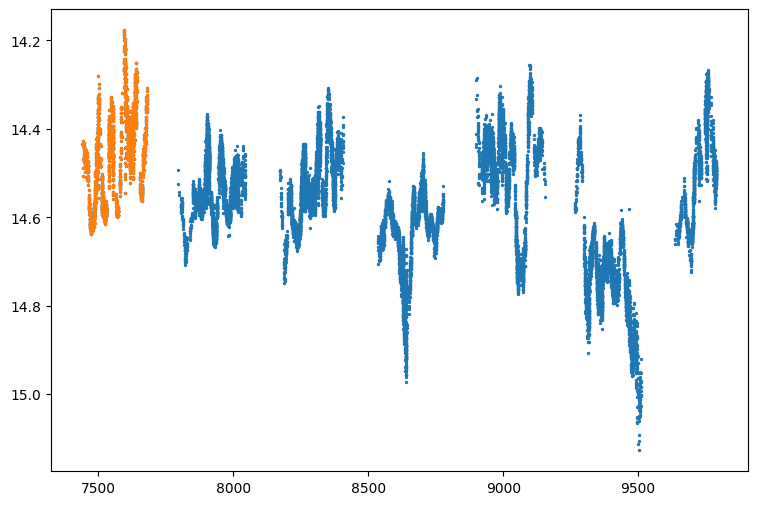

In [140]:
plt.scatter(eroscg2_hjd,eroscg2_imag,s=2)
plt.scatter(eroscg2_hjd[eroscg2_hjd<7750],
            eroscg2_imag[eroscg2_hjd<7750],s=2)
# plt.scatter(eroscg2_hjd,eroscg2_imag,s=2)
plt.gca().invert_yaxis()
# plt.savefig('../eroscg2_LC')
plt.show()

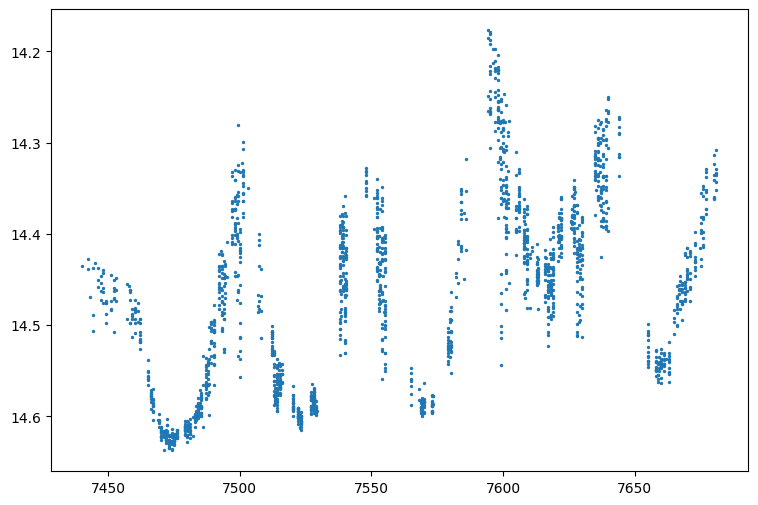

In [141]:
# plt.scatter(eroscg2_hjd,eroscg2_imag,s=2)
plt.scatter(eroscg2_hjd[eroscg2_hjd<7750],
            eroscg2_imag[eroscg2_hjd<7750],s=2)
# plt.scatter(eroscg2_hjd,eroscg2_imag,s=2)
plt.gca().invert_yaxis()
# plt.savefig('../eroscg2_LC')
plt.show()

In [150]:
freq,amp = calc_lomb_scargle(eroscg2_hjd[eroscg2_hjd<7750],
                             eroscg2_imag[eroscg2_hjd<7750])
# freq,amp = calc_lomb_scargle(eroscg2_hjd[np.abs(8300-eroscg2_hjd)<200],
#                              eroscg2_imag[np.abs(8300-eroscg2_hjd)<200])

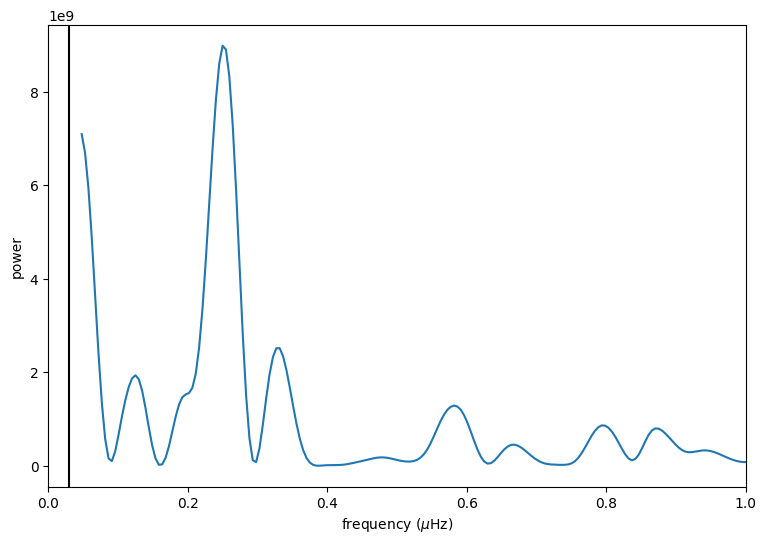

In [151]:
plt.plot(freq,amp**2)
plt.xlim(0,1)
plt.axvline(0.03,color='k')
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
# plt.savefig('../eroscg2_FT')
plt.show()

In [152]:
freq,amp = calc_lomb_scargle(eroscg2_hjd[eroscg2_hjd<8500],
                             eroscg2_imag[eroscg2_hjd<8500])
# freq,amp = calc_lomb_scargle(eroscg2_hjd[np.abs(8300-eroscg2_hjd)<200],
#                              eroscg2_imag[np.abs(8300-eroscg2_hjd)<200])

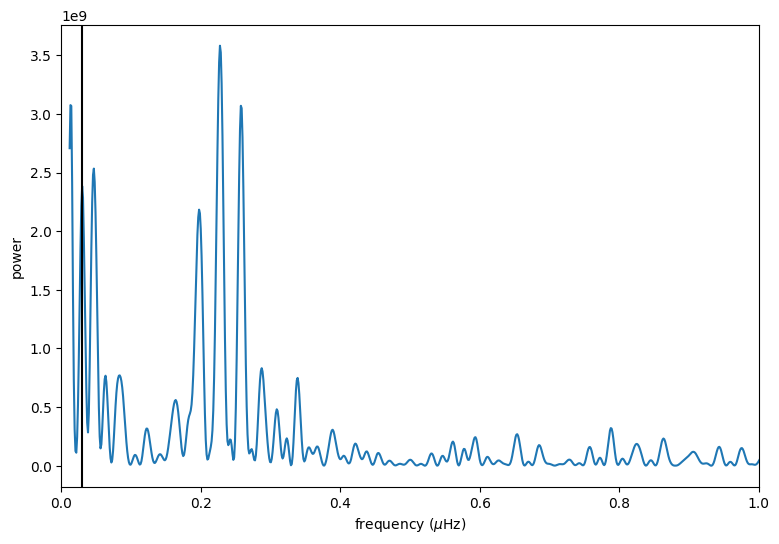

In [157]:
plt.plot(freq,amp**2)
plt.xlim(0,1)
plt.axvline(0.03,color='k')
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
# plt.savefig('../eroscg2_FT')
plt.show()

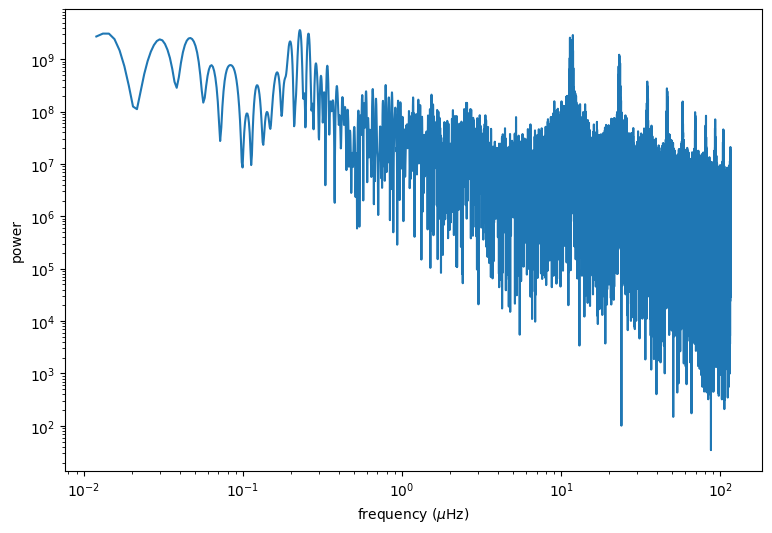

In [158]:
plt.plot(freq,amp**2)
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0,5)
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
# plt.savefig('../eroscg2_logFT')
plt.show()

In [54]:
11.574/365

0.03170958904109589

In [71]:
#trying to use pyriod to prewhiten the data
# %matplotlib widget
# from Pyriod import Pyriod

In [161]:
j174645 = np.loadtxt('../KMTnet_data/pydia.KMTNJ174645.9-250314.AI.txt')

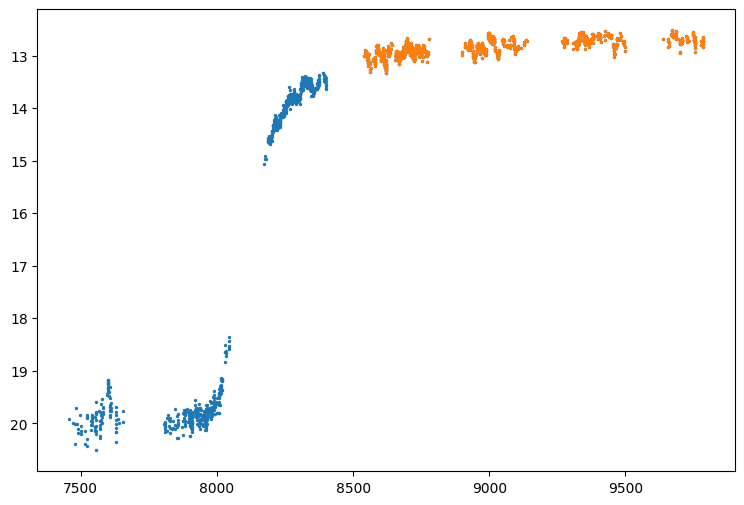

In [162]:
plt.scatter(j174645[:,0],j174645[:,1],s=2)
plt.scatter(j174645[:,0][j174645[:,0]>8500],j174645[:,1][j174645[:,0]>8500],s=2)
plt.gca().invert_yaxis()
# plt.savefig('../J174645_LC')
plt.show()

In [163]:
freq,amp = calc_lomb_scargle(j174645[:,0][j174645[:,0]>8500],
                             j174645[:,1][j174645[:,0]>8500])
# freq,amp = calc_lomb_scargle(j174645[:,0],
#                              j174645[:,1])

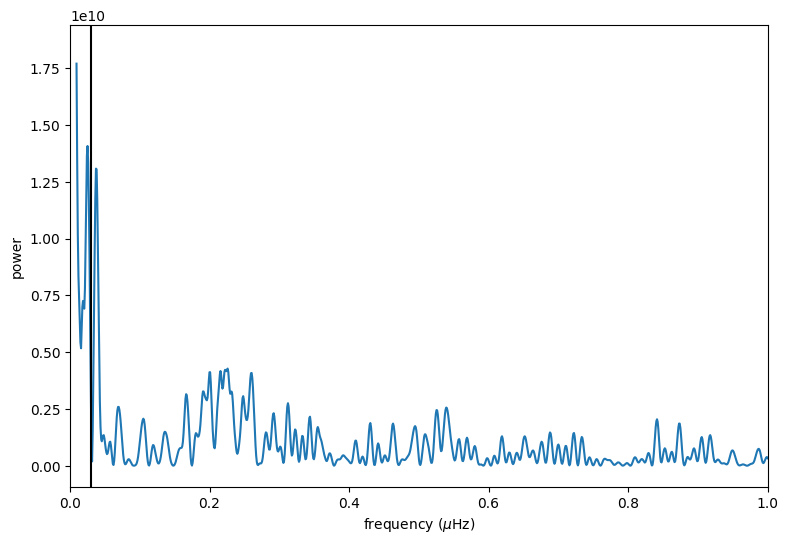

In [164]:
plt.plot(freq,amp**2)
plt.xlim(0,1)
plt.axvline(0.03,color='k')
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
# plt.savefig('../J174645_FT')
plt.show()

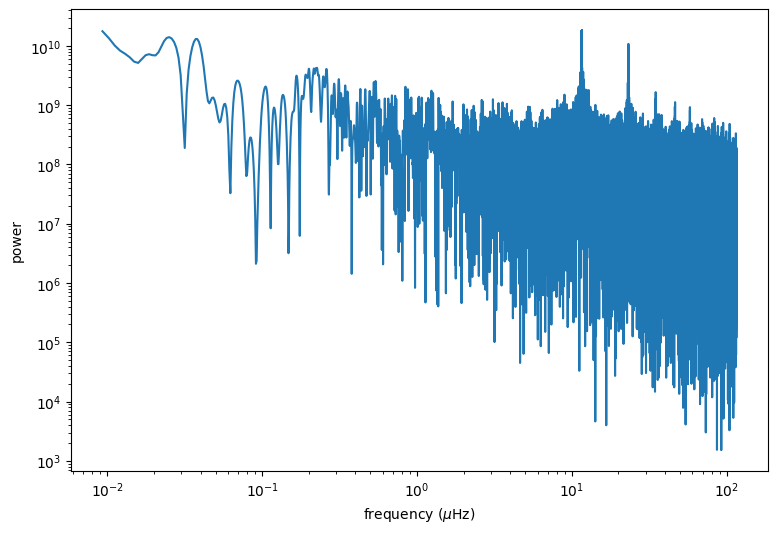

In [165]:
plt.plot(freq,amp**2)
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0,5)
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
# plt.savefig('../J174645_logFT')
plt.show()